# Text Generation with Markov Chains 

In [3]:
import random
from collections import defaultdict

class MarkovChainTextGenerator:
    def __init__(self):
        self.model = defaultdict(list)
    
    def train(self, text):
        words = text.split()
        
        # Build the model
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            self.model[current_word].append(next_word)

    def generate(self, start_word, length=20):
        if start_word not in self.model:
            raise ValueError(f"'{start_word}' not in training data")
        
        result = [start_word]
        current_word = start_word
        
        for _ in range(length - 1):  # Already added the start_word, so generate n-1 words
            next_word = random.choice(self.model[current_word])
            result.append(next_word)
            current_word = next_word
        
        return ' '.join(result)


# Example usage:
text = "I love programming in Python. Python is great for automation. I also love coding in Python."
markov_chain = MarkovChainTextGenerator()

# Train the model with text
markov_chain.train(text)

# Generate text starting with a word
generated_text = markov_chain.generate("Python", length=10)
print(generated_text)

Python is great for automation. I love programming in Python.


Simulated states over time:
['Submitted', 'Under Review', 'Reprocessed', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved', 'Approved']


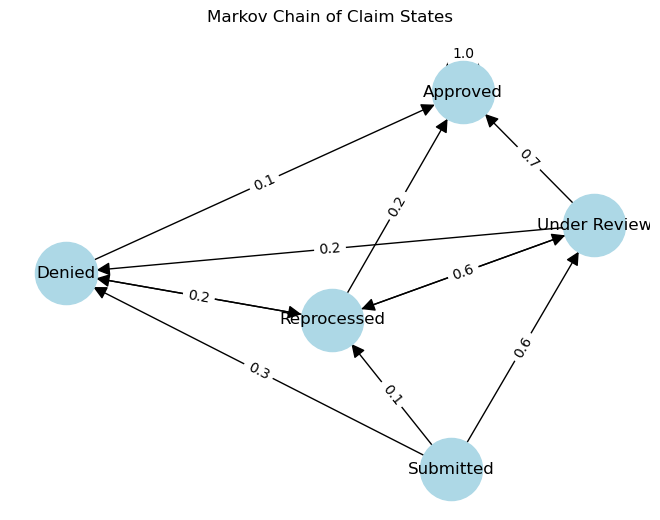

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the states of the claims process
states = ["Submitted", "Under Review", "Approved", "Denied", "Reprocessed"]

# Define the transition matrix
# Rows represent current states, columns represent next states.
transition_matrix = [
    [0.0, 0.6, 0.0, 0.3, 0.1],  # Submitted
    [0.0, 0.0, 0.7, 0.2, 0.1],  # Under Review
    [0.0, 0.0, 1.0, 0.0, 0.0],  # Approved (absorbing state)
    [0.0, 0.0, 0.1, 0.0, 0.9],  # Denied
    [0.0, 0.6, 0.2, 0.2, 0.0]   # Reprocessed
]

# Convert the transition matrix to a numpy array for easier computation
transition_matrix = np.array(transition_matrix)

# Function to simulate the Markov chain
def simulate_markov_chain(transition_matrix, states, start_state, steps=10):
    current_state = states.index(start_state)
    state_history = [start_state]

    for _ in range(steps):
        next_state = np.random.choice(
            states,
            p=transition_matrix[current_state]
        )
        state_history.append(next_state)
        current_state = states.index(next_state)

    return state_history

# Simulate the claim lifecycle starting from "Submitted"
np.random.seed(42)  # For reproducibility
simulated_states = simulate_markov_chain(
    transition_matrix,
    states,
    start_state="Submitted",
    steps=15
)

# Print the simulated states
print("Simulated states over time:")
print(simulated_states)

# Visualize the Markov chain as a graph
def visualize_markov_chain(transition_matrix, states):
    G = nx.DiGraph()

    # Add nodes and edges with probabilities as labels
    for i, state in enumerate(states):
        for j, next_state in enumerate(states):
            probability = transition_matrix[i][j]
            if probability > 0:
                G.add_edge(state, next_state, weight=probability, label=round(probability, 2))

    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Markov Chain of Claim States")
    plt.show()

# Visualize the Markov chain
visualize_markov_chain(transition_matrix, states)


Final state distribution after simulations:
Submitted: 0
Pending Documentation: 0
Under Review: 0
Approved: 770
Denied: 0
Appealed: 0
Reprocessed: 0
Finalized: 230


C:\Users\Sarav\AppData\Local\Temp\ipykernel_20308\259637491.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


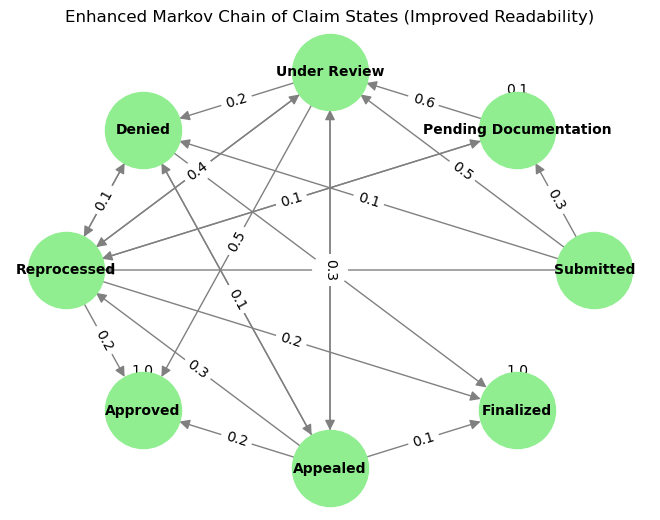

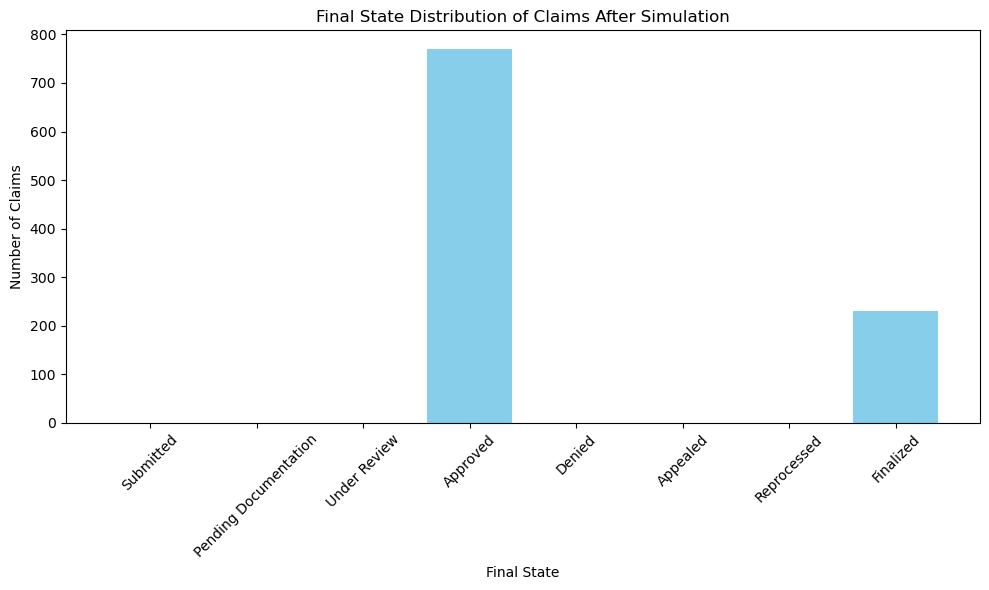

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Define the states of the claims process
states = ["Submitted", "Pending Documentation", "Under Review", "Approved", 
          "Denied", "Appealed", "Reprocessed", "Finalized"]

# Define a more complex transition matrix with additional states
transition_matrix = [
    [0.0, 0.3, 0.5, 0.0, 0.1, 0.0, 0.1, 0.0],  # Submitted
    [0.0, 0.1, 0.6, 0.0, 0.0, 0.0, 0.3, 0.0],  # Pending Documentation
    [0.0, 0.0, 0.0, 0.5, 0.2, 0.1, 0.2, 0.0],  # Under Review
    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],  # Approved (absorbing state)
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.4, 0.1],  # Denied
    [0.0, 0.0, 0.3, 0.2, 0.1, 0.0, 0.3, 0.1],  # Appealed
    [0.0, 0.1, 0.4, 0.2, 0.1, 0.0, 0.0, 0.2],  # Reprocessed
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   # Finalized (absorbing state)
]

# Convert the transition matrix to a numpy array for easier computation
transition_matrix = np.array(transition_matrix)

# Function to simulate the Markov chain for multiple claims
def simulate_markov_chain_batch(transition_matrix, states, start_state, steps=20, num_simulations=1000):
    start_index = states.index(start_state)
    state_counts = {state: 0 for state in states}

    all_state_histories = []

    for _ in range(num_simulations):
        current_state = start_index
        state_history = [states[current_state]]
        
        for _ in range(steps):
            next_state = np.random.choice(
                states,
                p=transition_matrix[current_state]
            )
            state_history.append(next_state)
            current_state = states.index(next_state)
            if next_state == "Finalized":  # Stop early if it reaches the absorbing state
                break

        # Update the state counts for this run
        state_counts[state_history[-1]] += 1
        all_state_histories.append(state_history)

    return state_counts, all_state_histories

# Simulate the claim lifecycle starting from "Submitted" with 1000 simulations
np.random.seed(42)  # For reproducibility
state_counts, all_state_histories = simulate_markov_chain_batch(
    transition_matrix,
    states,
    start_state="Submitted",
    steps=30,
    num_simulations=1000
)

# Print the simulation results
print("Final state distribution after simulations:")
for state, count in state_counts.items():
    print(f"{state}: {count}")

def visualize_markov_chain(transition_matrix, states):
    G = nx.DiGraph()

    # Add nodes and edges with probabilities as labels
    for i, state in enumerate(states):
        for j, next_state in enumerate(states):
            probability = transition_matrix[i][j]
            if probability > 0:
                G.add_edge(state, next_state, weight=probability, label=round(probability, 2))

    # Use a circular layout for better structure
    pos = nx.circular_layout(G)
    
    # Draw nodes with larger size and different colors for better visibility
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', 
            font_size=10, font_weight='bold', arrowsize=15, edge_color='gray')
    
    # Draw edges with labels that represent the probabilities
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title("Enhanced Markov Chain of Claim States (Improved Readability)")
    plt.tight_layout()
    plt.show()

# Visualize the updated Markov chain
visualize_markov_chain(transition_matrix, states)

# Analyze and plot the proportion of each final state
def plot_final_state_distribution(state_counts):
    states, counts = zip(*state_counts.items())
    plt.figure(figsize=(10, 6))
    plt.bar(states, counts, color='skyblue')
    plt.xlabel("Final State")
    plt.ylabel("Number of Claims")
    plt.title("Final State Distribution of Claims After Simulation")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the results
plot_final_state_distribution(state_counts)